# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Example function to train a linear regression model
def train_linear_regression(data, target_column):
    # Separate features and target
    X = data.drop(columns=[target_column])
    y = data[target_column]

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create and fit the model
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Mean Squared Error: {mse:.2f}')
    print(f'R^2 Score: {r2:.2f}')

    return model, scaler

# Usage example (assuming you have a DataFrame `df` with a target column 'target')
# model, scaler = train_linear_regression(df, 'target')


In [8]:
# load the data tips from sns
df = sns.load_dataset('tips')
df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='total_bill', ylabel='tip'>

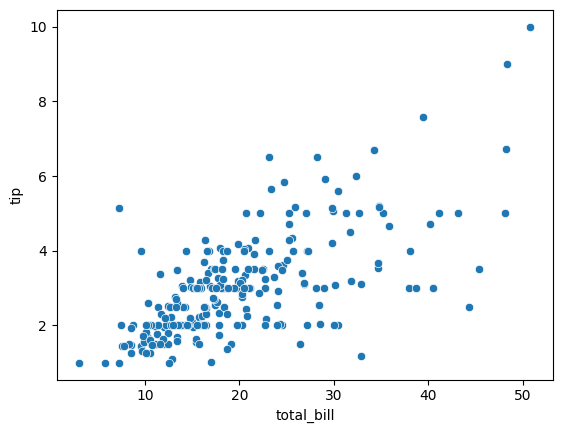

In [9]:
sns.scatterplot(x='total_bill', y='tip', data=df)

In [10]:
# split the data into X and y
X = df[['total_bill']]
# scalar = MinMaxScaler()
# X = scalar.fit_transform(X)
y = df['tip']

In [11]:
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
# call the model
model = LinearRegression()

In [13]:
# train the model
model.fit(X_train, y_train)

LinearRegression()

In [14]:
# take out model intercept and slop, make an equation
print(model.intercept_)
print(model.coef_)
print('y = ', model.intercept_, '+', model.coef_, '* X')

0.8372804575269974
[0.10991295]
y =  0.8372804575269974 + [0.10991295] * X


In [15]:
model.predict([[5]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.3868452])

In [16]:
# predict
y_pred = model.predict(X_test)

In [17]:
# evaluate the model
print('MSE = ', mean_squared_error(y_test, y_pred))
print('R2 = ', r2_score(y_test, y_pred))
print('RMSE = ', np.sqrt(mean_squared_error(y_test, y_pred)))

MSE =  0.7856266749214385
R2 =  0.4918314764359769
RMSE =  0.8863558398980843


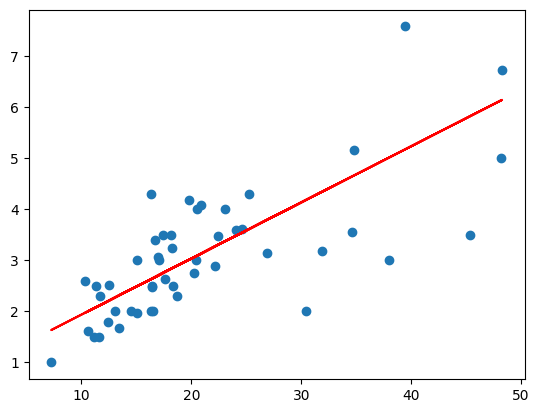

In [18]:
# plot the model and data
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red')
plt.show()